In [2]:
import numpy as np
%pylab inline
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from itertools import product
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from xgboost import XGBRegressor, XGBClassifier, Booster, plot_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import RidgeClassifier, RandomizedLasso, Ridge

Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Модель прошлой недели

In [4]:
total=pd.read_pickle('taxi_features_data.pkl')

In [8]:
train_subset=total[:"2016-04-30 23:00:00"]
train_y1=train_subset.y1.values
train_y2=train_subset.y2.values
train_y3=train_subset.y3.values
train_y4=train_subset.y4.values
train_y5=train_subset.y5.values
train_y6=train_subset.y6.values
train_subset.drop(['y1','y2','y3','y4','y5','y6',],1,inplace=True)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
test_may=total["2016-05-01 00:00:00":"2016-05-31 23:00:00"]
test_y1=test_may.y1.values
test_y2=test_may.y2.values
test_y3=test_may.y3.values
test_y4=test_may.y4.values
test_y5=test_may.y5.values
test_y6=test_may.y6.values
test_may.drop(['y1','y2','y3','y4','y5','y6',],1,inplace=True)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
dum1=pd.get_dummies(train_subset.reg)
dum3=pd.get_dummies(test_may.reg)
train_subset=pd.concat((train_subset,dum1),axis=1)
test_may=pd.concat((test_may,dum3),axis=1)
train_subset.drop('reg',1,inplace=True)
test_may.drop('reg',1,inplace=True)

In [11]:
est=RandomizedLasso()
X_new=est.fit_transform(train_subset.values, train_y1)
est1=XGBRegressor(n_estimators=70,max_depth=3)
est1.fit(X_new, train_y1)

C:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 29 iterations, i.e. alpha=2.172e-03, with an active set of 29 regressors, and the smallest cholesky pivot element being 2.980e-08
  ConvergenceWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 29 iterations, i.e. alpha=2.172e-03, with an active set of 29 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 55 iterations, i.e. alpha=1.086e-03, with an active set of 51 regressors, and the smallest cholesky pivot element being 2.581e-08
  ConvergenceWarning)
C:\Program Files\Anaconda2\lib\

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [12]:
est2=XGBRegressor(n_estimators=70,max_depth=3)
est2.fit(X_new, train_y2)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [13]:
est3=XGBRegressor(n_estimators=70,max_depth=3)
est3.fit(X_new, train_y3)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [14]:
est4=XGBRegressor(n_estimators=70,max_depth=3)
est4.fit(X_new, train_y4)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [15]:
est5=XGBRegressor(n_estimators=70,max_depth=3)
est5.fit(X_new, train_y5)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [16]:
est6=XGBRegressor(n_estimators=70,max_depth=3)
est6.fit(X_new, train_y6)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [17]:
test_may_new=est.transform(test_may.values)
pr1=est1.predict(test_may_new)
pr2=est2.predict(test_may_new)
pr3=est3.predict(test_may_new)
pr4=est4.predict(test_may_new)
pr5=est5.predict(test_may_new)
pr6=est6.predict(test_may_new)

In [18]:
ans=np.sum(np.abs(test_y1-pr1))+np.sum(np.abs(test_y2-pr2))+np.sum(np.abs(test_y3-pr3))+np.sum(np.abs(test_y4-pr4))+np.sum(np.abs(test_y5-pr5))+np.sum(np.abs(test_y6-pr6))
float(ans)/102/739/6

27.97101043731502

Добавим признаки:
1. Метка ночного времени для зон, относящихся к аэропорту.
2. Кол-во поездок из соседних зон за час, день, неделю.
3. Метка праздников США.

In [115]:
airport=np.unique(total.reg.values)[-5:]

array(['2068', '2069', '2118', '2119', '2168'], dtype=object)

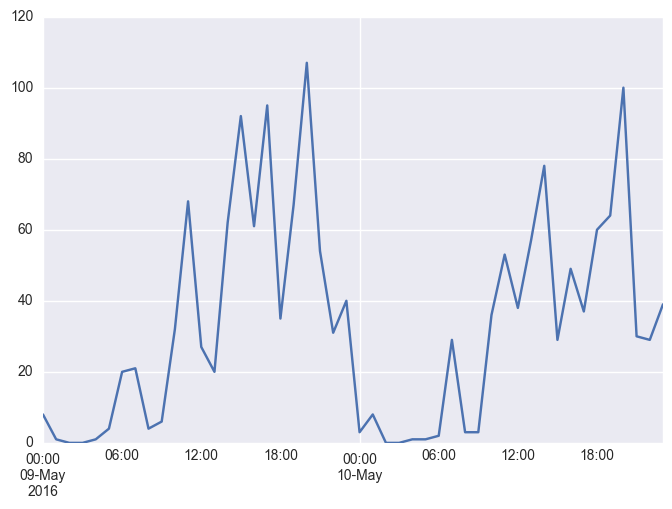

In [171]:
len(pr1)/102

715

In [95]:
#Метель 23 января
total['blizzard']=0
total['blizzard'][(total.index.month == 1)&(total.index.day == 23)]=1
#В праздники заказы такси как в выходной день, поэтому все праздники объединим в один признак
total['holidays']=0
#День Мартина Лютера Кинга
total['holidays'][(total.index.month == 1)&(total.index.day == 18)]=1
#Президентский день
total['holidays'][(total.index.month == 2)&(total.index.day == 15)]=1
#День памяти
total['holidays'][(total.index.month == 5)&(total.index.day == 30)]=1
#День независимости
total['holidays'][(total.index.month == 7)&(total.index.day == 3)]=1
#День Труда
total['holidays'][(total.index.month == 9)&(total.index.day == 7)]=1
#День благодарения
total['holidays'][(total.index.month == 11)&(total.index.day == 26)]=1
total['holidays'][(total.index.month == 11)&(total.index.day == 27)]=1
#Рождество
total['holidays'][(total.index.month == 12)&(total.index.day == 25)]=1

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be 

In [7]:
total['air']=0
total['air'][(total.reg == airport[0])&(total.index.hour <6)]=1
total['air'][(total.reg == airport[1])&(total.index.hour <6)]=1
total['air'][(total.reg == airport[2])&(total.index.hour <6)]=1
total['air'][(total.reg == airport[3])&(total.index.hour <6)]=1
total['air'][(total.reg == airport[4])&(total.index.hour <6)]=1

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWi

In [96]:
total.to_pickle('taxi_new_features_data_holidays.pkl')

In [59]:
def neighbour_reg(x,delay=1):
    reg=int(x['reg'])
    data=x.index
    neib=[reg+1,reg-1,reg+50,reg-50]
    pr_data=data-relativedelta(hours=delay)
    f=[]
    for i in neib:
        try:
            y=total['y'][(total.reg==str(i))&(total.index==pr_data)]
            f.append(y)
        except:
            continue
    if len(y)==0:
        return 0
    else:
        return np.mean(y)

In [88]:
k=1
row=np.array([])
for reg in total.reg.unique():
    neib={str(int(reg)+1),str(int(reg)-1),str(int(reg)+50),str(int(reg)-50)}&set(total.reg.unique())
    if len(neib)==0:
        v=np.append(np.zeros(k),total.y[total.reg==reg].values[:-k])
        row=np.append(row,v)
        continue
    for n in neib:
        v=np.zeros(9504)
        v+=np.append(np.zeros(k),total.y[total.reg==str(n)].values[:-k])
    v=v/len(neib)
    row=np.append(row,v)
total['neibh_1h']=row

In [92]:
k=24
row=np.array([])
for reg in total.reg.unique():
    neib={str(int(reg)+1),str(int(reg)-1),str(int(reg)+50),str(int(reg)-50)}&set(total.reg.unique())
    if len(neib)==0:
        v=np.append(np.zeros(k),total.y[total.reg==reg].values[:-k])
        row=np.append(row,v)
        continue
    for n in neib:
        v=np.zeros(9504)
        v+=np.append(np.zeros(k),total.y[total.reg==str(n)].values[:-k])
    v=v/len(neib)
    row=np.append(row,v)
total['neibh_24h']=row

In [94]:
k=168
row=np.array([])
for reg in total.reg.unique():
    neib={str(int(reg)+1),str(int(reg)-1),str(int(reg)+50),str(int(reg)-50)}&set(total.reg.unique())
    if len(neib)==0:
        v=np.append(np.zeros(k),total.y[total.reg==reg].values[:-k])
        row=np.append(row,v)
        continue
    for n in neib:
        v=np.zeros(9504)
        v+=np.append(np.zeros(k),total.y[total.reg==str(n)].values[:-k])
    v=v/len(neib)
    row=np.append(row,v)
total['neibh_168h']=row

In [200]:
k=672
row=np.array([])
for reg in total.reg.unique():
    neib={str(int(reg)+1),str(int(reg)-1),str(int(reg)+50),str(int(reg)-50)}&set(total.reg.unique())
    if len(neib)==0:
        v=np.append(np.zeros(k),total.y[total.reg==reg].values[:-k])
        row=np.append(row,v)
        continue
    for n in neib:
        v=np.zeros(9504)
        v+=np.append(np.zeros(k),total.y[total.reg==str(n)].values[:-k])
    v=v/len(neib)
    row=np.append(row,v)
total['neibh_672h']=row

In [287]:
total.drop('neibh_672h',1,inplace=True)

In [288]:
total.to_pickle('taxi_new_features_data_holidays.pkl')

In [2]:
total=pd.read_pickle('taxi_new_features_data_holidays.pkl')

Добавим признаков из сырых данных: среднее кол-во пассажиров, дистанция поездки, тип оплаты, общий счет, время поездки.

In [3]:
add=pd.read_pickle('additional_new_features.pkl')
add.head()

,passenger_count,trip_distance,payment_type,total_amount,time,reg
2015-06-01 00:00:00,2.075000,3.943750,1.425000,17.367750,661.375000,1075
2015-06-01 01:00:00,1.882353,6.298235,1.294118,23.553529,978.411765,1075
2015-06-01 02:00:00,1.000000,7.920000,1.800000,26.110000,982.000000,1075
2015-06-01 03:00:00,2.200000,9.384000,1.200000,33.660000,1041.200000,1075
2015-06-01 04:00:00,2.125000,6.648750,1.250000,25.496250,923.000000,1075


In [146]:
total.to_pickle('finish_features_transf.pkl')

In [3]:
total=pd.read_pickle('finish_features.pkl')

In [33]:
table=pd.DataFrame(columns=clmn)
for r in np.unique(total.reg):
    tmp=pd.concat((total[total.reg==r],add[add.reg==r]),axis=1)
    table=pd.concat((table,tmp))
    print(r)

1075
1076
1077
1125
1126
1127
1128
1129
1130
1131
1132
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1221
1222
1223
1224
1225
1227
1228
1229
1230
1231
1232
1233
1234
1235
1272
1273
1274
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1326
1327
1331
1332
1333
1334
1335
1336
1337
1338
1339
1376
1377
1378
1380
1382
1383
1384
1385
1386
1387
1388
1389
1390
1426
1431
1434
1435
1436
1437
1438
1439
1441
1442
1480
1482
1483
1530
1532
1533
1580
1630
1684
1733
1734
1783
2068
2069
2118
2119
2168


Убираем пропущенные значения и масштабируем

In [4]:
total.head()

,c1,c10,c11,c12,c13,c14,c15,c16,c17,c18,...,neibh_24h,neibh_168h,blizzard,holidays,passenger_count,trip_distance,payment_type,total_amount,time,reg
2015-06-01 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,2.075000,3.943750,1.425000,17.367750,661.375000,1075
2015-06-01 01:00:00,0.999301,0.930874,0.916562,0.900969,0.884115,8.660254e-01,0.846724,0.826239,0.804598,0.781831,...,0.0,0.0,0.0,0.0,1.882353,6.298235,1.294118,23.553529,978.411765,1075
2015-06-01 02:00:00,0.997204,0.733052,0.680173,0.623490,0.563320,5.000000e-01,0.433884,0.365341,0.294755,0.222521,...,0.0,0.0,0.0,0.0,1.000000,7.920000,1.800000,26.110000,982.000000,1075
2015-06-01 03:00:00,0.993712,0.433884,0.330279,0.222521,0.111964,6.123234e-17,-0.111964,-0.222521,-0.330279,-0.433884,...,0.0,0.0,0.0,0.0,2.200000,9.384000,1.200000,33.660000,1041.200000,1075
2015-06-01 04:00:00,0.988831,0.074730,-0.074730,-0.222521,-0.365341,-5.000000e-01,-0.623490,-0.733052,-0.826239,-0.900969,...,0.0,0.0,0.0,0.0,2.125000,6.648750,1.250000,25.496250,923.000000,1075


In [5]:
new_features=['passenger_count','trip_distance','payment_type','total_amount','time']

In [6]:
total[['passenger_count','trip_distance','payment_type','total_amount','time']]=total[['passenger_count','trip_distance','payment_type','total_amount','time']].fillna(0)

In [ ]:
scaler = StandardScaler()
total[total.columns]=scaler.fit_transform(total[total.columns])

In [216]:
scaler=MinMaxScaler()
total=scaler.fit_transform(total)

In [12]:
#a=total['reg'].values[:,0]
#del total['reg']
total['reg']=a

In [15]:
train_subset=total[:]
train_y1=train_subset.y1.values
train_y2=train_subset.y2.values
train_y3=train_subset.y3.values
train_y4=train_subset.y4.values
train_y5=train_subset.y5.values
train_y6=train_subset.y6.values
train_subset.drop(['y1','y2','y3','y4','y5','y6',],1,inplace=True)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
test_may=total["2016-05-01 00:00:00":"2016-05-31 23:00:00"]
test_y1=test_may.y1.values
test_y2=test_may.y2.values
test_y3=test_may.y3.values
test_y4=test_may.y4.values
test_y5=test_may.y5.values
test_y6=test_may.y6.values
test_may.drop(['y1','y2','y3','y4','y5','y6',],1,inplace=True)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
dum1=pd.get_dummies(train_subset.reg)
#dum3=pd.get_dummies(test_may.reg)
train_subset=pd.concat((train_subset,dum1),axis=1)
#test_may=pd.concat((test_may,dum3),axis=1)
train_subset.drop('reg',1,inplace=True)
#test_may.drop('reg',1,inplace=True)

In [230]:
est=RandomizedLasso()
X_new=train_subset.values
#X_new=est.fit_transform(train_subset.values, train_y1)
est1=XGBRegressor(n_estimators=70,max_depth=3)
est1.fit(X_new, train_y1)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [231]:
est2=XGBRegressor(n_estimators=70,max_depth=3)
est2.fit(X_new, train_y2)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [232]:
est3=XGBRegressor(n_estimators=70,max_depth=3)
est3.fit(X_new, train_y3)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [233]:
est4=XGBRegressor(n_estimators=70,max_depth=3)
est4.fit(X_new, train_y4)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [234]:
est5=XGBRegressor(n_estimators=70,max_depth=3)
est5.fit(X_new, train_y5)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [235]:
est6=XGBRegressor(n_estimators=70,max_depth=3)
est6.fit(X_new, train_y6)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=70, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [236]:
#test_may_new=est.transform(test_may.values)
test_may_new=test_may.values
pr1=est1.predict(test_may_new)
pr2=est2.predict(test_may_new)
pr3=est3.predict(test_may_new)
pr4=est4.predict(test_may_new)
pr5=est5.predict(test_may_new)
pr6=est6.predict(test_may_new)

In [174]:
ans=np.sum(np.abs(test_y1-pr1))+np.sum(np.abs(test_y2-pr2))+np.sum(np.abs(test_y3-pr3))+np.sum(np.abs(test_y4-pr4))+np.sum(np.abs(test_y5-pr5))+np.sum(np.abs(test_y6-pr6))
float(ans)/102/739/6

26.842324766505033

In [237]:
ans=np.sum(np.abs(test_y1-pr1))+np.sum(np.abs(test_y2-pr2))+np.sum(np.abs(test_y3-pr3))+np.sum(np.abs(test_y4-pr4))+np.sum(np.abs(test_y5-pr5))+np.sum(np.abs(test_y6-pr6))
float(ans)/102/739/6

0.1078124384139492

In [187]:
print(sum(np.abs(test_y1-pr1))/102/739)
print(sum(np.abs(test_y2-pr2))/102/739)
print(sum(np.abs(test_y3-pr3))/102/739)
print(sum(np.abs(test_y4-pr4))/102/739)
print(sum(np.abs(test_y5-pr5))/102/739)
print(sum(np.abs(test_y6-pr6))/102/739)

20.7314320585
26.3957040932
30.5575689682
29.2985670697
29.5015590762
36.2418606903


In [176]:
print(sum(np.abs(test_y1-pr1))/102/739)
print(sum(np.abs(test_y2-pr2))/102/739)
print(sum(np.abs(test_y3-pr3))/102/739)
print(sum(np.abs(test_y4-pr4))/102/739)
print(sum(np.abs(test_y5-pr5))/102/739)
print(sum(np.abs(test_y6-pr6))/102/739)

20.7801155011
26.2884765802
27.9977648415
28.5360272561
28.7858821372
28.6656822829


In [201]:
print(sum(np.abs(test_y1-pr1))/102/739)
print(sum(np.abs(test_y2-pr2))/102/739)
print(sum(np.abs(test_y3-pr3))/102/739)
print(sum(np.abs(test_y4-pr4))/102/739)
print(sum(np.abs(test_y5-pr5))/102/739)
print(sum(np.abs(test_y6-pr6))/102/739)

20.7801155011
26.2839259561
27.9727345063
28.5049130737
28.7858821372
28.6656822829


In [243]:
del total['reg']

In [244]:
total=scaler.inverse_transform(total)

In [186]:
#test_may_new=test_may.values
test_may_new=est.transform(test_may.values)
pr1=est1.predict(test_may_new)
print(sum(np.abs(test_y1-pr1))/102/739)

20.7314320585


In [211]:
import pickle
with open('est1.pkl','wb') as f:
    pickle.dump(est1,f)
with open('est2.pkl','wb') as f:
    pickle.dump(est2,f)
with open('est3.pkl','wb') as f:
    pickle.dump(est3,f)
with open('est4.pkl','wb') as f:
    pickle.dump(est4,f)
with open('est5.pkl','wb') as f:
    pickle.dump(est5,f)
with open('est6.pkl','wb') as f:
    pickle.dump(est6,f)

In [162]:
test_may_new=test_may.values
#test_may_new=est.transform(test_may.values)
pr1=est1.predict(test_may_new)
sum(pr1)/102/739/6

25.423147337419408

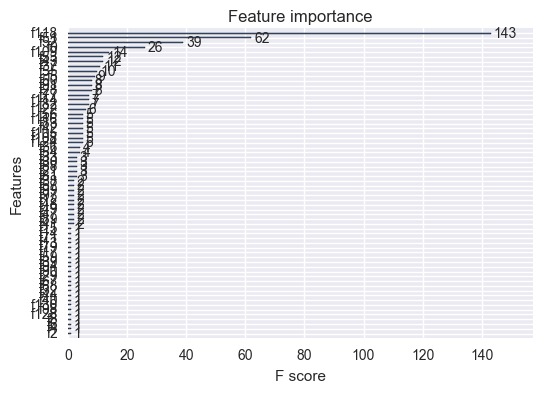

In [212]:
plot_importance(est1)

In [289]:
total.columns.values

array([u'c1', u'c10', u'c11', u'c12', u'c13', u'c14', u'c15', u'c16',
       u'c17', u'c18', u'c19', u'c2', u'c20', u'c21', u'c22', u'c23',
       u'c24', u'c25', u'c26', u'c27', u'c28', u'c29', u'c3', u'c30',
       u'c31', u'c32', u'c33', u'c34', u'c35', u'c4', u'c5', u'c6', u'c7',
       u'c8', u'c9', u'day', u'hour', u'k1', 'k10', 'k11', 'k12', 'k13',
       'k14', 'k15', 'k16', 'k17', 'k18', 'k19', u'k2', 'k20', 'k21',
       'k22', 'k23', 'k24', u'k3', u'k4', u'k5', u'k6', 'k7', 'k8', 'k9',
       u'kd1', 'kd10', 'kd11', 'kd12', 'kd13', 'kd14', u'kd2', 'kd3',
       'kd4', 'kd5', 'kd6', 'kd7', 'kd8', 'kd9', u'month', 'pr', u'reg',
       u's1', u's10', u's11', u's12', u's13', u's14', u's15', u's16',
       u's17', u's18', u's19', u's2', u's20', u's21', u's22', u's23',
       u's24', u's25', u's26', u's27', u's28', u's29', u's3', u's30',
       u's31', u's32', u's33', u's34', u's35', u's4', u's5', u's6', u's7',
       u's8', u's9', u'sum12', u'sum168', u'sum24', u'sum720', u'week'

In [204]:
test_june=total["2016-05-31 23:00:00":"2016-06-30 17:00:00"]
test_y1=test_june.y1.values
test_y2=test_june.y2.values
test_y3=test_june.y3.values
test_y4=test_june.y4.values
test_y5=test_june.y5.values
test_y6=test_june.y6.values
test_june.drop(['y1','y2','y3','y4','y5','y6',],1,inplace=True)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [205]:
dum2=pd.get_dummies(test_june.reg)
test_june=pd.concat((test_june,dum2),axis=1)
test_june.drop('reg',1,inplace=True)

In [206]:
#test_june_new=est.transform(test_june.values)
test_june_new=test_june.values
pr1=est1.predict(test_june_new)
pr2=est2.predict(test_june_new)
pr3=est3.predict(test_june_new)
pr4=est4.predict(test_june_new)
pr5=est5.predict(test_june_new)
pr6=est6.predict(test_june_new)
pr1[pr1<0]=0
pr2[pr2<0]=0
pr3[pr3<0]=0
pr4[pr4<0]=0
pr5[pr5<0]=0
pr6[pr6<0]=0

In [207]:
ans=np.sum(np.abs(test_y1-pr1))+np.sum(np.abs(test_y2-pr2))+np.sum(np.abs(test_y3-pr3))+np.sum(np.abs(test_y4-pr4))+np.sum(np.abs(test_y5-pr5))+np.sum(np.abs(test_y6-pr6))
float(ans)/102/715/6

25.02902140377661

In [43]:
def get_ans(x):
    return x['reg']+'_'+str(x['date'].date())+'_'+str((x['date'].hour))

In [46]:
test_june['date']=test_june.index
test_june['ans']=test_june.apply(get_ans,axis=1)
date=test_june['ans'].values
ans=pd.DataFrame(columns=['id','y'])

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [47]:
date1=[x+'_1' for x in date]
date2=[x+'_2' for x in date]
date3=[x+'_3' for x in date]
date4=[x+'_4' for x in date]
date5=[x+'_5' for x in date]
date6=[x+'_6' for x in date]

In [48]:
ans1=pd.DataFrame(zip(date1,pr1),columns=['id','y'])
ans2=pd.DataFrame(zip(date2,pr2),columns=['id','y'])
ans3=pd.DataFrame(zip(date3,pr3),columns=['id','y'])
ans4=pd.DataFrame(zip(date4,pr4),columns=['id','y'])
ans5=pd.DataFrame(zip(date5,pr5),columns=['id','y'])
ans6=pd.DataFrame(zip(date6,pr6),columns=['id','y'])

In [49]:
ans=pd.concat((ans,ans1),axis=0)
ans=pd.concat((ans,ans2),axis=0)
ans=pd.concat((ans,ans3),axis=0)
ans=pd.concat((ans,ans4),axis=0)
ans=pd.concat((ans,ans5),axis=0)
ans=pd.concat((ans,ans6),axis=0)

In [50]:
ans.to_csv('taxi333.csv',index=False)

In [9]:
with open('est1.pkl','rb') as f:
    est1=pickle.load(f)
with open('est2.pkl','rb') as f:
    est2=pickle.load(f)
with open('est3.pkl','rb') as f:
    est3=pickle.load(f)
with open('est4.pkl','rb') as f:
    est4=pickle.load(f)
with open('est5.pkl','rb') as f:
    est5=pickle.load(f)
with open('est6.pkl','rb') as f:
    est6=pickle.load(f)

In [7]:
import pickle

In [33]:
pr6=est6.predict(train_subset.values)

In [34]:
with open('pr6.pkl','wb') as f:
    pickle.dump(pr6,f)

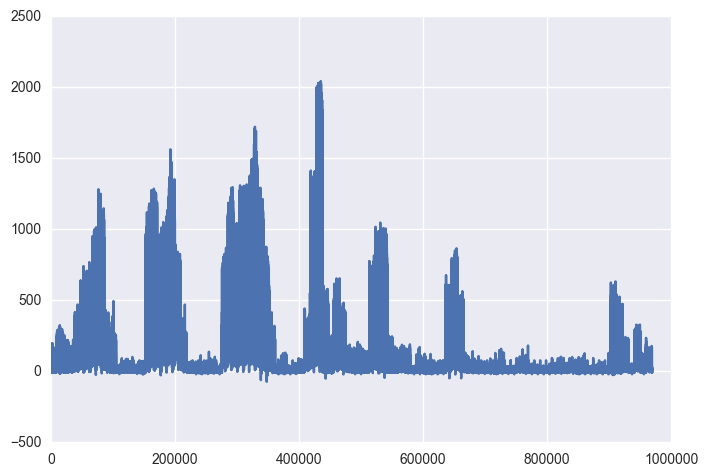

In [27]:
plt.plot(pr3)

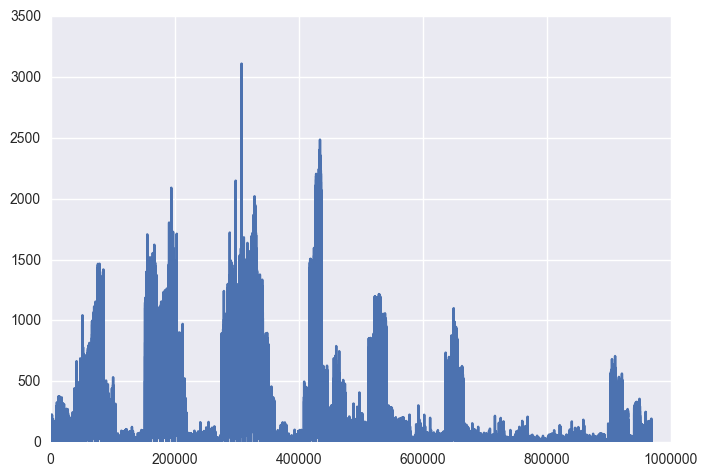

In [28]:
plt.plot(train_y3)